## Dividir el dataset en conjunto de entrenamiento y de testing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("datasets/ads/Advertising.csv")

In [11]:
a = np.random.randn(len(data))

(array([ 5.,  8., 19., 24., 52., 42., 24., 13.,  7.,  6.]),
 array([-2.83086257, -2.25674629, -1.68263   , -1.10851371, -0.53439742,
         0.03971887,  0.61383515,  1.18795144,  1.76206773,  2.33618402,
         2.91030031]),
 <a list of 10 Patch objects>)

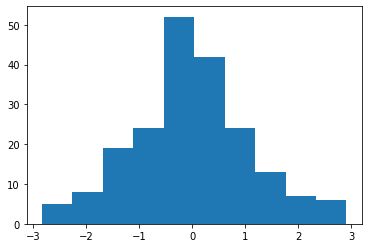

In [12]:
plt.hist(a)

In [18]:
check = (a<0.8)
training = data[check]
testing = data[~check]


In [16]:
len(training), len(testing)

(160, 40)

In [23]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     627.8
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.26e-75
Time:                        22:25:08   Log-Likelihood:                -312.79
No. Observations:                 160   AIC:                             631.6
Df Residuals:                     157   BIC:                             640.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0168      0.333      9.047      0.000       2.358       3.675
TV             0.0453      0.002     28.766      0.000       0.042       0.048
Radio          0.1848      0.010     19.370      0.000       0.166       0.204
==============================================================================
Omnibus:                       51.936   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.700
Skew:                          -1.352   Prob(JB):                     2.52e-29
Kurtosis:                       6.528   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* modelo resultante 
* Sales = 3.0168 + 0.0453*TV + 0.1848*Radio

# Validación del modelo con el conjunto de testing

In [25]:
sales_pred = lm.predict(testing)

In [26]:
SSD = sum((testing['Sales']-sales_pred)**2)

In [27]:
RSE = np.sqrt(SSD/(len(testing)-2-1))

In [28]:
sales_mean = np.mean(testing['Sales'])

In [29]:
error = RSE /sales_mean

In [30]:
error

0.1020894995920307